In [33]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [23]:
style.use('fivethirtyeight')

In [13]:
xs = np.array(list(set(range(1,7))), dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

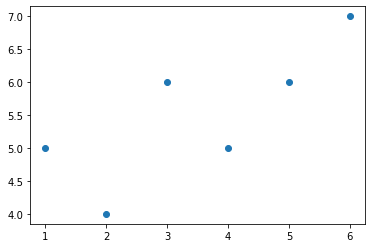

In [14]:
plt.scatter(xs,ys)
plt.show()

In [20]:
# slope (m) for the "best-fit line"
# y-intercept (b) for the "best-fit line"

def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean (xs * ys)) / 
        ((mean(xs))**2 - (mean(xs**2)))
        )
    b = mean(ys) - m*mean(xs)
    
    
    return m, b

In [21]:
m,b = best_fit_slope_and_intercept(xs, ys)
print(m,b)

0.42857142857142866 4.0


In [24]:
regression_line = [(m*x) + b for x in xs]

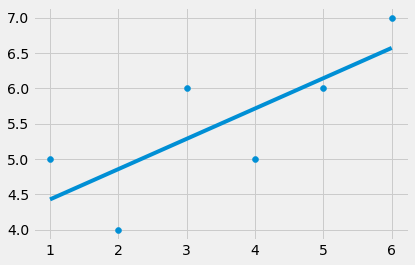

In [25]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

In [26]:
predict_x = 8
predict_y = (m*predict_x) + b

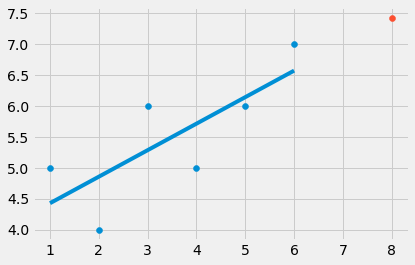

In [27]:
plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y)
plt.plot(xs,regression_line)
plt.show()

In [ ]:
# Manually calculating accuracy (r**2 or Coefficient of Determination)
# r**2 = 1- (SEy^) / (SE(mean(y)))      ( y^== "best-fit-line" / "regression line" ) (SE == Squared Error)

In [29]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [30]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.5844155844155845


In [36]:
# Generating a random dataset to test 

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys2 = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys2.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs2 = [i for i in range(len(ys2))]
    return np.array(xs2, dtype=np.float64), np.array(ys2, dtype=np.float64)

In [42]:
xs2, ys2 = create_dataset(40, 10, 2, correlation='pos')

In [43]:
m, b = best_fit_slope_and_intercept(xs2, ys2)
regression_line2 = [(m * x) + b for x in xs2]
predict_x = 8
predict_y = (m * predict_x) + b
r_squared2 = coefficient_of_determination(ys2, regression_line2)
print(r_squared2)

0.9553336149688179


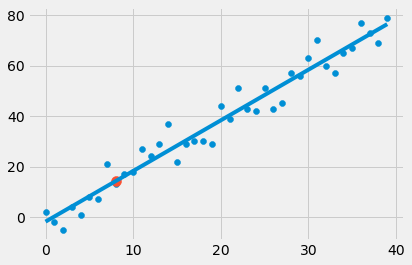

In [44]:
plt.scatter(xs2, ys2)
plt.plot(xs2, regression_line2)
plt.scatter(predict_x, predict_y, s=100)
plt.show()